<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL" data-toc-modified-id="SQL-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SQL</a></span></li><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Аналитика</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Изучить базу данных авиакомпаний и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

## SQL

query_1.csv — результат первого запроса. В нём содержится такая информация:
model — модель самолета;
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

query_3.csv — результат третьего запроса. В нём содержится такая информация:
city — город;
average_flights — среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года.

## Аналитика

**импортировать файлы**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('/datasets/query_1.csv')
data1.info()
data1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
data2 = pd.read_csv('/datasets/query_3.csv')
data2.info()
print()
print('дубликаты', data2.city.duplicated().sum())
data2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB

дубликаты 0


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


В данных нет пропусков, нет дубликатов.

**изучить данные в них**

In [4]:
data1.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В указанной таблице действительно мало данных. Они выглядят корректными. Можно заметить, что больше всего рейсов было совершено на модели Cessna 208 Caravan, а меньше всего на Boeing 777-300.

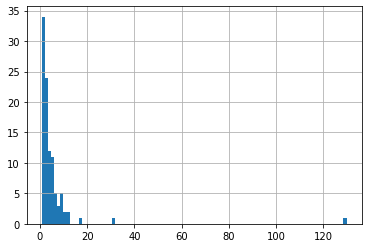

In [5]:
data2.average_flights.hist(bins=100)

In [6]:
data2.loc[data2['average_flights']>120]

,city,average_flights
43,Москва,129.774194


Данные тоже выглядят корректными. Есть один город с аномально высоким средним значением рейсов в день, но это Москва. Так что я думаю, это не ошибка. Так же большинство городов со средним значением рейсов около 1.

**проверить типы данных на корректность**

In [7]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Типы данных указаны правильно

**выбрать топ-10 городов по количеству рейсов**

In [8]:
data2_top=data2.sort_values(by='average_flights', ascending=False).head(10)
data2_top

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


**построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов**

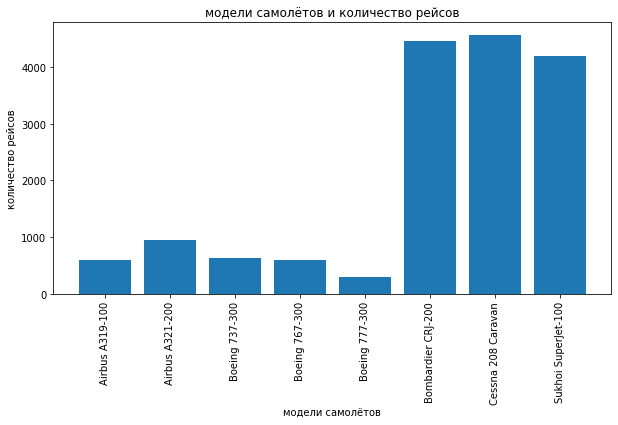

In [9]:
plt.figure(figsize=(10, 5))
plt.xlabel('модели самолётов')
plt.ylabel('количество рейсов')
plt.title('модели самолётов и количество рейсов')
plt.xticks(rotation=90)
plt.bar(data1.model, data1.flights_amount)
plt.show()

По графику видно, что на более известных моделях Airbus и Boeing летают значительно реже, чем на других моделях самолетов, которые в предыдущем задании были отнесены к категории other

**Исправление**

Самолеты Airbus и Boeing имеют большую вместимость пассажиров (от 300 до 500 человек) и предназначены для длительных перелетов. Тогда как остальные модели относятся к самолетам для более коротких расстояний и с меньшей вместимостью (от 20 до 100 человек).

Видимо, большие самолеты летают в крупные города из крупных городов с большим пассажиропотоком. А маленькие самолеты используются для меньших городов, которых в России больше.

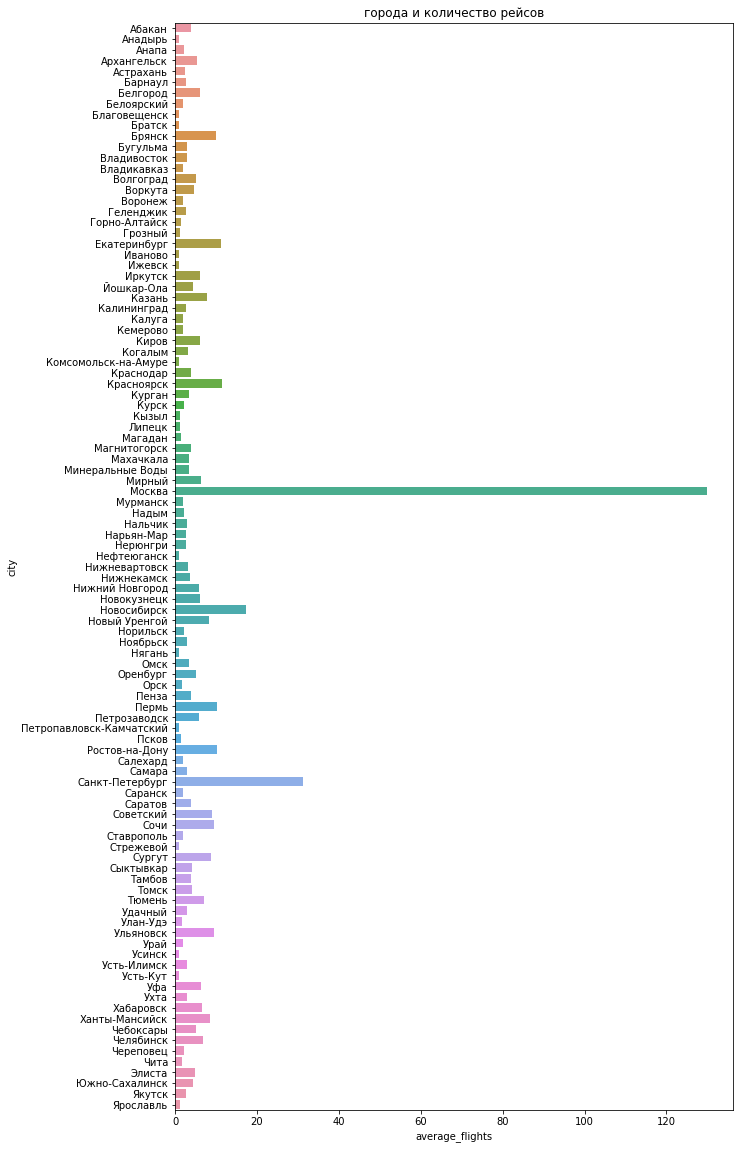

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 20))
plt.ylabel('города')
plt.xlabel('количество рейсов')
plt.title('города и количество рейсов')
sns.barplot(y=data2.city, x=data2.average_flights)
plt.show()

Самый популярный город для полетов - Москва - значительно превышает среднее значение авиарейсов за день для других городов. Санкт-Петербург тоже выделяется на графике. Остальные города находятся в промежутке между 0 и 20 полетами в день.

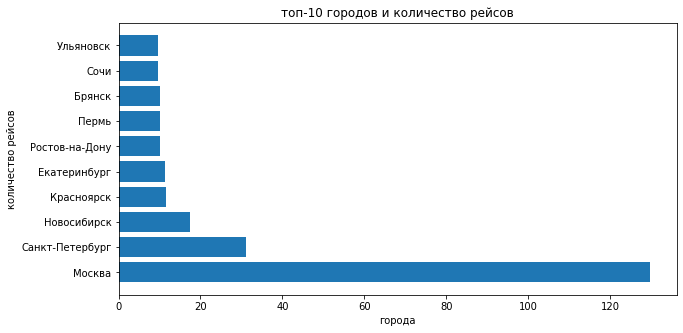

In [11]:
plt.figure(figsize=(10, 5))
plt.xlabel('города')
plt.ylabel('количество рейсов')
plt.title('топ-10 городов и количество рейсов')
#plt.xticks(rotation=90)
plt.barh(data2_top.city, data2_top.average_flights)
plt.show()

Аналогично предыдущему графику: полетов в Москву в 4 раза больше, чем в Санкт-Петербург, и в 6 раз больше, чем в остальные города топ-10

Новосибирск находится в середине России, то есть связывает крупные города на востоке страны (Питер и Москву) с Сибирью и западной частью России.

**Общий вывод**

В ходе данной работы был проанализирован спрос на авиабилеты в города России за сентябрь и его связь с проведением фестивалей в этих городах.

Самое большое количество авиарейсов в день было сделано в Москву (примерно в 6 раз больше, чем в другие города). 

Такой аномально высокий спрос связан скорее не с проведением фестивалей в Москве, а с тем, что она является крупнейшим транспортным узлом в России, имеет 3 крупных аэропорта, и многие рейсы проходят транзитом через Москву.

Результаты предыдущего задания подтверждают, что спрос на авиабилеты слабо связан с проведением фестивалей.